# Week 5 Assessment on Free text and NLP

### In this assessment, I was required to perform NLP tasks such as tokenisation, Character and Word level visualisation as well as working with embeddings. It exposed me to basic NLP principles and sparked my interest in the field.



### Installing Packages

In [1]:
!pip install numpy
!pip install scipy
!pip install nltk
!pip install gensim
!pip install sentencepiece
!pip install requests
!pip install BeautifulSoup

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 109.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 15.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatib

KeyboardInterrupt: 

### Importing Packages

In [1]:
import numpy as np
import scipy
import nltk
import gensim
import sentencepiece
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

### Getting Data from Site - CNN

In [12]:
response = requests.get("https://cnn.com")

print("Response Status Code:", response.status_code)


Response Status Code: 200


In [15]:
from bs4 import BeautifulSoup
import requests
import re

response = requests.get("https://cnn.com/")
site_news_root = BeautifulSoup(response.content, "lxml")

In [72]:
site_news_root.text[500:1000]

'                                                             Video player was slow to load content\n                                                                        \n\n\n\n                                                                        Video content never loaded\n                                                                        \n\n\n\n                                                                        Ad froze or did not finish loading\n                                           '

### Removing Unnecessary Spaces and Newline Characters

In [20]:
site_news = re.sub(r"\s+"," ", site_news_root.text)

In [21]:
site_news[50:100]

'alues your feedback 1. How relevant is this ad to '

In [23]:
site_news_lines = [re.sub(r"\s+", " ",line).strip() for line in site_news_root.text.split('\n') if line.strip()]

In [24]:
site_news_lines = [re.sub(r"\d+", "", line.lower()) for line in site_news_lines if len(line.split()) > 3]

In [29]:
site_news_lines = [re.sub(r"[^\w\s]", "", line.lower()) for line in site_news_lines if len(line.split()) > 3]

In [30]:
site_news_lines[50:100]

['chicago mayor defies trump with order to counter possible troop deployment',
 'tensions soar in indonesia as protests spread',
 ' years after emmett tilläôs death the gun used to kill him has been put on display',
 'ukraine blows up key russian bridges',
 'why trump enjoys a äòpresidential exemptionäô to the conflictofinterest law',
 'white house redlines and democratic demands set up shutdown showdown',
 'three scottish brothers have made history by completing the fastest unsupported nonstop row across the pacific ocean  the worldäôs largest ocean  with  days at sea',
 'scottish brothers finish record day row across pacific calling for pizza and beer',
 'reinvent your fall wardrobe with these  labor day clothing deals',
 'we found the  best alarm clocks to wake you up in the morning',
 'amazonäôs labor day sale has hundreds of deals these  are most worth shopping',
 'donäôt spend labor day weekend hunting for sales our experts found the  best deals',
 'dysonäôs besttested vacuums an

### Performing Word Tokenization Using NLTK


In [31]:
!pip install nltk
import nltk # pip install nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [32]:
wt_site_news_lines = [word_tokenize(sentence) for sentence in site_news_lines]
wt_site_news_lines[50:100]

[['chicago',
  'mayor',
  'defies',
  'trump',
  'with',
  'order',
  'to',
  'counter',
  'possible',
  'troop',
  'deployment'],
 ['tensions', 'soar', 'in', 'indonesia', 'as', 'protests', 'spread'],
 ['years',
  'after',
  'emmett',
  'tilläôs',
  'death',
  'the',
  'gun',
  'used',
  'to',
  'kill',
  'him',
  'has',
  'been',
  'put',
  'on',
  'display'],
 ['ukraine', 'blows', 'up', 'key', 'russian', 'bridges'],
 ['why',
  'trump',
  'enjoys',
  'a',
  'äòpresidential',
  'exemptionäô',
  'to',
  'the',
  'conflictofinterest',
  'law'],
 ['white',
  'house',
  'redlines',
  'and',
  'democratic',
  'demands',
  'set',
  'up',
  'shutdown',
  'showdown'],
 ['three',
  'scottish',
  'brothers',
  'have',
  'made',
  'history',
  'by',
  'completing',
  'the',
  'fastest',
  'unsupported',
  'nonstop',
  'row',
  'across',
  'the',
  'pacific',
  'ocean',
  'the',
  'worldäôs',
  'largest',
  'ocean',
  'with',
  'days',
  'at',
  'sea'],
 ['scottish',
  'brothers',
  'finish',
  'r

### Character Tokenization

In [33]:
ct_site_news_lines = [list(sentence) for sentence in site_news_lines]
print(ct_site_news_lines[50])

['c', 'h', 'i', 'c', 'a', 'g', 'o', ' ', 'm', 'a', 'y', 'o', 'r', ' ', 'd', 'e', 'f', 'i', 'e', 's', ' ', 't', 'r', 'u', 'm', 'p', ' ', 'w', 'i', 't', 'h', ' ', 'o', 'r', 'd', 'e', 'r', ' ', 't', 'o', ' ', 'c', 'o', 'u', 'n', 't', 'e', 'r', ' ', 'p', 'o', 's', 's', 'i', 'b', 'l', 'e', ' ', 't', 'r', 'o', 'o', 'p', ' ', 'd', 'e', 'p', 'l', 'o', 'y', 'm', 'e', 'n', 't']


### Subword Tokenization Using Sentence Piece

In [39]:
with open('datums.txt', 'w') as o:
    o.write('\n'.join(site_news_lines))

In [42]:
import sentencepiece as spm

spm.SentencePieceTrainer.train(input='datums.txt', model_prefix='m', vocab_size=800)

In [43]:
sp = spm.SentencePieceProcessor(model_file='m.model')

In [44]:
word1 = 'investment'
tokens1 = sp.EncodeAsPieces(word1)
print(tokens1)

['▁in', 've', 'st', 'ment']


In [45]:
word2 = 'digestion'
tokens2 = sp.EncodeAsPieces(word2)
print(tokens2)

['▁di', 'ges', 't', 'ion']


### Character and Word Frequency Visualisation

In [46]:
from tqdm.auto import tqdm

site_news_separate_characters = list(''.join(site_news_lines))
character_frequency = np.unique(site_news_separate_characters, return_counts=True)

<BarContainer object of 32 artists>

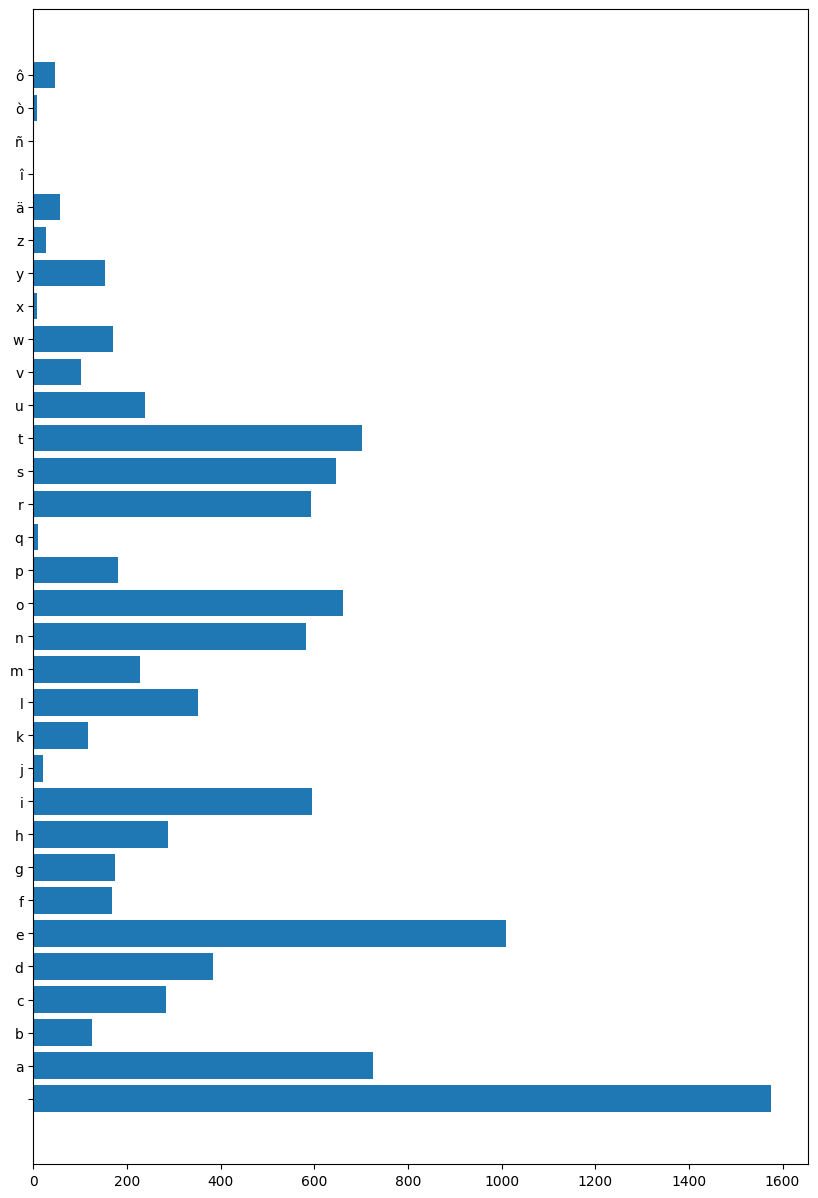

In [47]:
plt.figure(figsize=(10, 15))
plt.barh(character_frequency[0], character_frequency[1])

In [48]:
new_site_news_words = ' '.join(site_news_lines)
word_frequency = np.unique(new_site_news_words.split(), return_counts=True)

<BarContainer object of 916 artists>

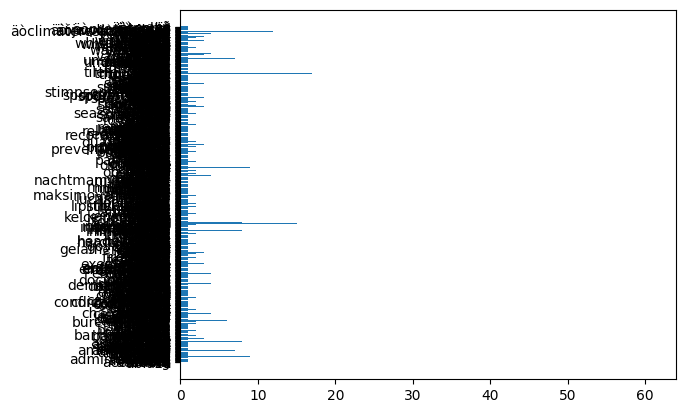

In [49]:
plt.barh(word_frequency[0], word_frequency[1])

### Word Cloud

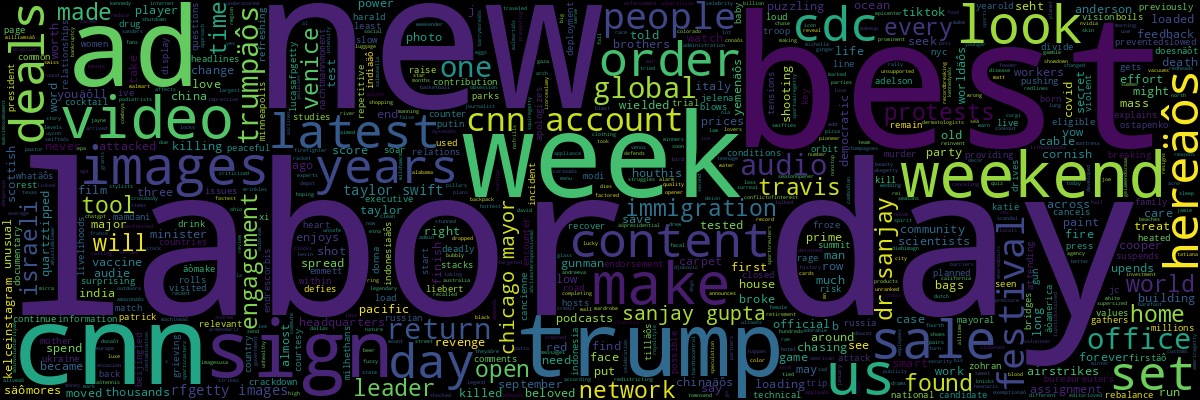

In [50]:
from wordcloud import WordCloud

wc = WordCloud(width=1200, height=400, max_words=6000, random_state=42).generate(new_site_news_words)
wc.to_image()

### TF-IDF using Gensim

In [51]:
import gensim as gs
from gensim import corpora
from gensim.models import TfidfModel


dictionary = corpora.Dictionary(wt_site_news_lines)


bow_corpus = [dictionary.doc2bow(sentence) for sentence in wt_site_news_lines]

tfidf_model = TfidfModel(bow_corpus)


tfidf_vectors = [tfidf_model[bow] for bow in bow_corpus]

In [52]:
# Display results
idx = 42
sentence = wt_site_news_lines[idx]
print("Sentence:", sentence)
for word_id, score in tfidf_vectors[idx]:
    print(f"{dictionary[word_id]}: {score:.4f}")

Sentence: ['whatäôs', 'open', 'and', 'closed', 'on', 'labor', 'day']
and: 0.1799
on: 0.3036
open: 0.4164
closed: 0.5293
day: 0.2582
labor: 0.2741
whatäôs: 0.5293


### Performing Word Similarity

In [53]:
!gdown 0B7XkCwpI5KDYNlNUTTlSS21pQmM

Downloading...
From (original): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
From (redirected): https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM&confirm=t&uuid=082700fe-5be6-467f-bbfb-b5544d92e3e6
To: /content/GoogleNews-vectors-negative300.bin.gz
100% 1.65G/1.65G [00:15<00:00, 110MB/s]


In [54]:
!gunzip GoogleNews-vectors-negative300.bin.gz

In [55]:
from gensim.models import KeyedVectors

# Loading pre-trained word embeddings
word_vectors = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [56]:
def gensim_similarity(word1, word2):
    if word1 in word_vectors and word2 in word_vectors:
        return word_vectors.similarity(word1, word2)
    return 0

In [58]:
print(gensim_similarity("run", "drive"))

0.483405


### Visualising Word Embeddings

In [66]:
selected_words = ['arch', 'manning', 'struggles', 'in', 'loss', 'to', 'ohio']
word_embeddings = np.array([word_vectors[word] for word in selected_words if word in word_vectors])
word_embeddings.shape

(6, 300)

In [69]:
from sklearn.manifold import TSNE

def visualize_embeddings_2D(selected_words, word_embeddings, word_vectors):
    # Project embeddings into 2D using t-SNE
    tsne = TSNE(n_components=2, random_state=42, learning_rate='auto', perplexity=3)
    word_2d_embeddings = tsne.fit_transform(word_embeddings)

    plt.figure(figsize=(8, 8))
    # Iterate through word_embeddings to ensure indices are within bounds
    for i in range(word_2d_embeddings.shape[0]):
        # Find the corresponding word in selected_words that has a vector
        word = [w for w in selected_words if w in word_vectors][i]
        plt.scatter(word_2d_embeddings[i, 0], word_2d_embeddings[i, 1], marker='+', color='red')
        plt.text(word_2d_embeddings[i, 0]+0.2, word_2d_embeddings[i, 1], word, fontsize=9)
    plt.show()

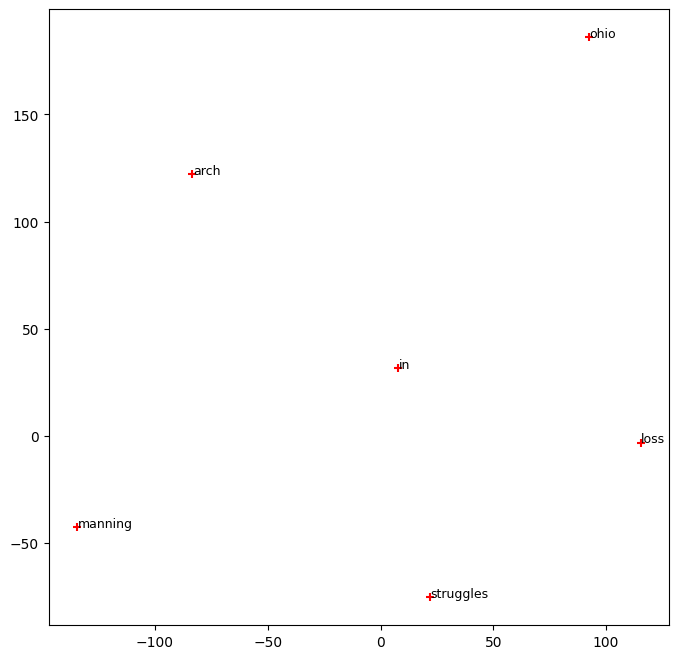

In [70]:
visualize_embeddings_2D(selected_words, word_embeddings, word_vectors)

### Training A word Embedding Model

In [71]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=wt_site_news_lines, vector_size=300, window=5, min_count=1, workers=4)
model.save("my_word2vec_model.bin")

In [60]:
model = Word2Vec.load('my_word2vec_model.bin')

In [73]:
model.wv.similarity('labor','state')

0.0077660503